In [68]:
from picai_eval import evaluate, evaluate_folder
from report_guided_annotation import extract_lesion_candidates
import os

from pathlib import Path

import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

import numpy as np

In [69]:
unet_folder = Path("UNet/infer/results_F0")
vnet_folder = Path("VNet/results_F0")
vnet_pad_folder = Path("VNet_pad/results_F0")
unet_daft_folder = Path("UNet_DAFT/results_F0")
unet_xgboost_folder = Path("UNet_XGBoost/infer/results_F0")

labels_folder = Path("val_labels")

In [70]:
unet = sorted(list(map(lambda f: unet_folder / f, os.listdir(unet_folder))), key=lambda f: int(str(f).split('/')[-1].split('.')[0]))
vnet = sorted(list(map(lambda f: vnet_folder / f, os.listdir(vnet_folder))), key=lambda f: int(str(f).split('/')[-1].split('.')[0]))
vnet_pad = sorted(list(map(lambda f: vnet_pad_folder / f, os.listdir(vnet_pad_folder))), key=lambda f: int(str(f).split('/')[-1].split('.')[0]))
unet_daft = sorted(list(map(lambda f: unet_daft_folder / f, os.listdir(unet_daft_folder))), key=lambda f: int(str(f).split('/')[-1].split('.')[0]))
unet_xgboost = sorted(list(map(lambda f: unet_xgboost_folder / f, os.listdir(unet_xgboost_folder))), key=lambda f: int(str(f).split('/')[-1].split('.')[0]))

labels = sorted(list(map(lambda f: labels_folder / f, os.listdir(labels_folder))), key=lambda f: int(str(f).split('/')[-1].split('.')[0].split('_')[1]))[:len(unet)]

In [71]:
unet_ids = np.array(list(map(lambda f: int(str(f).split('/')[-1].split('.')[0]), unet)))
vnet_ids = np.array(list(map(lambda f: int(str(f).split('/')[-1].split('.')[0]), vnet)))
vnet_pad_ids = np.array(list(map(lambda f: int(str(f).split('/')[-1].split('.')[0]), vnet_pad)))
unet_daft_ids = np.array(list(map(lambda f: int(str(f).split('/')[-1].split('.')[0]), unet_daft)))
label_ids = np.array(list(map(lambda f: int(str(f).split('/')[-1].split('.')[0].split('_')[1]), labels)))


# print(unet_ids - label_ids)
# print(vnet_ids - label_ids)
# print(vnet_pad_ids - label_ids)
# print(unet_daft_ids - label_ids)

# print(np.sum(np.array(map(lambda f: f.split('/')[-1].split('.')[0], preds)) - np.array(map(lambda f: f.split('/')[-1].split('.')[0], labels))))

In [72]:
metrics_unet = evaluate(
  y_det=unet,
  y_true=labels,
  y_det_postprocess_func=lambda pred: extract_lesion_candidates(pred)[0],
)

metrics_vnet = evaluate(
  y_det=vnet,
  y_true=labels,
  y_det_postprocess_func=lambda pred: extract_lesion_candidates(pred)[0],
)

metrics_vnet_pad = evaluate(
  y_det=vnet_pad,
  y_true=labels,
  y_det_postprocess_func=lambda pred: extract_lesion_candidates(pred)[0],
)

metrics_unet_daft = evaluate(
  y_det=unet_daft,
  y_true=labels,
  y_det_postprocess_func=lambda pred: extract_lesion_candidates(pred)[0],
)

metrics_unet_xgboost = evaluate(
  y_det=unet_xgboost,
  y_true=labels,
  y_det_postprocess_func=lambda pred: extract_lesion_candidates(pred)[0],
)

In [73]:
metrics_unet_xgboost = evaluate(
  y_det=unet_xgboost,
  y_true=labels,
  y_det_postprocess_func=lambda pred: extract_lesion_candidates(pred)[0],
)

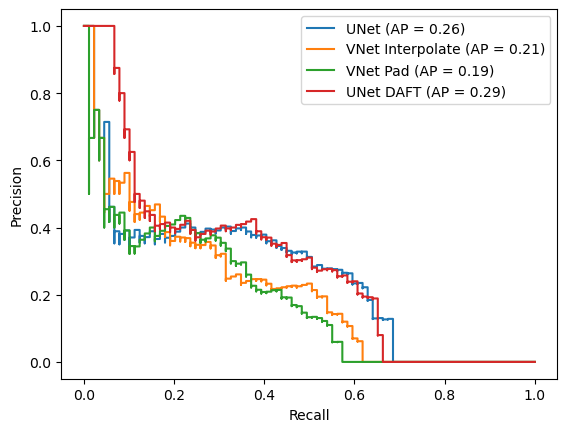

In [74]:
disp = PrecisionRecallDisplay(precision=metrics_unet.precision, recall=metrics_unet.recall, average_precision=metrics_unet.AP, estimator_name='UNet')
disp.plot()
ax = plt.gca()

disp = PrecisionRecallDisplay(precision=metrics_vnet.precision, recall=metrics_vnet.recall, average_precision=metrics_vnet.AP, estimator_name='VNet Interpolate')
disp.plot(ax=ax)

disp = PrecisionRecallDisplay(precision=metrics_vnet_pad.precision, recall=metrics_vnet_pad.recall, average_precision=metrics_vnet_pad.AP, estimator_name='VNet Pad')
disp.plot(ax=ax)

disp = PrecisionRecallDisplay(precision=metrics_unet_daft.precision, recall=metrics_unet_daft.recall, average_precision=metrics_unet_daft.AP, estimator_name='UNet DAFT')
disp.plot(ax=ax)

ax.legend(loc='upper right')

plt.show()

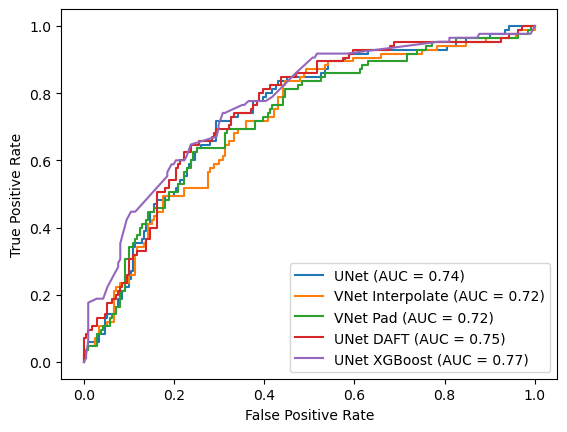

In [75]:
disp = RocCurveDisplay(fpr=metrics_unet.case_FPR, tpr=metrics_unet.case_TPR, roc_auc=metrics_unet.auroc, estimator_name='UNet')
disp.plot()
ax = plt.gca()

disp = RocCurveDisplay(fpr=metrics_vnet.case_FPR, tpr=metrics_vnet.case_TPR, roc_auc=metrics_vnet.auroc, estimator_name='VNet Interpolate')
disp.plot(ax=ax)

disp = RocCurveDisplay(fpr=metrics_vnet_pad.case_FPR, tpr=metrics_vnet_pad.case_TPR, roc_auc=metrics_vnet_pad.auroc, estimator_name='VNet Pad')
disp.plot(ax=ax)

disp = RocCurveDisplay(fpr=metrics_unet_daft.case_FPR, tpr=metrics_unet_daft.case_TPR, roc_auc=metrics_unet_daft.auroc, estimator_name='UNet DAFT')
disp.plot(ax=ax)

disp = RocCurveDisplay(fpr=metrics_unet_xgboost.case_FPR, tpr=metrics_unet_xgboost.case_TPR, roc_auc=metrics_unet_xgboost.auroc, estimator_name='UNet XGBoost')
disp.plot(ax=ax)

plt.show()

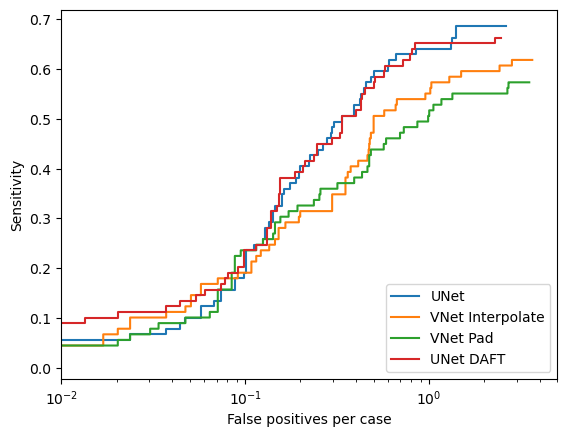

In [83]:
disp = RocCurveDisplay(fpr=metrics_unet.lesion_FPR, tpr=metrics_unet.lesion_TPR, estimator_name='UNet')
disp.plot()
ax = plt.gca()

disp = RocCurveDisplay(fpr=metrics_vnet.lesion_FPR, tpr=metrics_vnet.lesion_TPR, estimator_name='VNet Interpolate')
disp.plot(ax=ax)

disp = RocCurveDisplay(fpr=metrics_vnet_pad.lesion_FPR, tpr=metrics_vnet_pad.lesion_TPR, estimator_name='VNet Pad')
disp.plot(ax=ax)

disp = RocCurveDisplay(fpr=metrics_unet_daft.lesion_FPR, tpr=metrics_unet_daft.lesion_TPR, estimator_name='UNet DAFT')
disp.plot(ax=ax)

ax.set_xlim(0.01, 5.0)
ax.set_xscale('log')
ax.set_xlabel("False positives per case")
ax.set_ylabel("Sensitivity")

plt.show()